# 6. Hidden Layer도 추가하고, Hidden Layer에 들어가는 Perceptron 숫자들도 바꿔보기


Hyper Parameter 설정

In [ ]:
batch_size = 10
epochs = 200

## Hidden Layer Perceptron 갯수 조정

In [ ]:
num_classes = 3

모델에 필요한 함수 및 라이브러리 선언

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
def hist_view(hist):
  print('## training loss and acc ##')
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='center')

  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='center right')

  plt.show()

Data Setting


In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
x=iris.data

y= keras.utils.to_categorical(iris.target, num_classes)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((105, 4), (45, 4), (105, 3), (45, 3))

모델 만들기

## hidden layer 추가
추가한 Hidden Layer 에 num_classes 를 통해 Hidden Layer의 Perceptron 갯수가 조정 된다.

In [ ]:
model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(4,)))
# add 를 통해 Hidden Layer 를 추가해준다.
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


모델의 Function 정의

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


모델 훈련

In [ ]:
# batch_size,epochs
hist=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))



Epoch 1/200
11/11 [==============================] - 1s 18ms/step - loss: 3.0105 - accuracy: 0.3048 - val_loss: 2.2052 - val_accuracy: 0.4000
Epoch 2/200
11/11 [==============================] - 0s 6ms/step - loss: 2.5643 - accuracy: 0.3048 - val_loss: 1.8736 - val_accuracy: 0.4000
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 2.1722 - accuracy: 0.3048 - val_loss: 1.5610 - val_accuracy: 0.4000
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 1.7993 - accuracy: 0.3048 - val_loss: 1.2844 - val_accuracy: 0.4000
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 1.4734 - accuracy: 0.3048 - val_loss: 1.0852 - val_accuracy: 0.4000
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 1.2143 - accuracy: 0.3048 - val_loss: 0.9354 - val_accuracy: 0.4000
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 1.0176 - accuracy: 0.3143 - val_loss: 0.8355 - val_accuracy: 0.4667
Epoch 8/200


## 결과확인

## training loss and acc ##


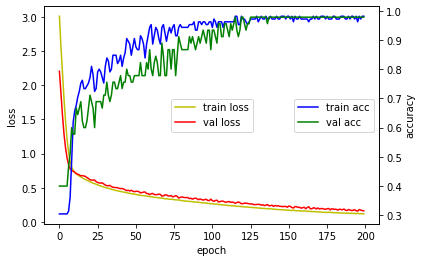

Test loss: 0.16173213720321655
Test accuracy: 0.9777777791023254


In [ ]:
hist_view(hist)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [ ]:
decoder = {k:v for k,v in enumerate( iris.target_names )}

In [ ]:
r=np.argmax(model.predict(x_test[:10,:]), axis=-1)
[decoder[i] for i in r]

['virginica',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor']

# 샘플 데이터가 아닌 나의 데이터로 분석해 보고 싶다. 